In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import numpy as np

In [3]:
data_dir ='data/argument_extraction_corpus_2015/annotated-phrases-by-topic/'

In [4]:
dp = pd.read_csv(os.path.join(data_dir, 'dp-slider-means.csv'))
evo= pd.read_csv(os.path.join(data_dir, 'evo-slider-means.csv'))
gc = pd.read_csv(os.path.join(data_dir, 'gc-slider-means.csv'))
gm = pd.read_csv(os.path.join(data_dir, 'gm-slider-means.csv'))

# distribution of connectives

In [30]:
dp.head(2)

,Unnamed: 0,ItemId,GoodSliderMean,GoodSliderDev,Connective.x,PairType.x,ResponseInitial.x,Phrase.x
0,658,ab5810d83f23243ddce713ac23d775cd,1.0,NaN,so,P1_P2,false,"Sorry for the length of the post, but I hope i..."
1,871,e0a35a65ce12b2457e8ff1f9b8cec749,1.0,0.0,no_connective,P1_P2,true,I am all for the death penalty.


In [5]:
evo.head(2)

,Unnamed: 0,ItemId,GoodSliderMean,GoodSliderDev,Connective.x,PairType.x,ResponseInitial.x,Phrase.x
0,45,07d44327dba6636e0a6747d4a8a1d2d7,1.0,NaN,but,P1_P2,False,But yes I reject the way speculations presente...
1,393,50c3925340bede3080f6118d56383aaf,1.0,NaN,so,P1_P2,False,So I believe in evolution.


In [14]:
evo_con_internal = evo[(evo['Connective.x']!='no_connective')& (evo['ResponseInitial.x']==False)]['GoodSliderMean'].to_list()
evo_con_initial = evo[(evo['Connective.x']!='no_connective') & (evo['ResponseInitial.x']==True)]['GoodSliderMean'].to_list()


In [16]:
len(evo_con_internal), len(evo_con_initial)

(503, 477)

In [18]:
dp_con_internal = dp[(dp['Connective.x']!='no_connective')& (dp['ResponseInitial.x']=='false')]['GoodSliderMean'].to_list()
dp_con_initial = dp[(dp['Connective.x']!='no_connective') & (dp['ResponseInitial.x']=='true')]['GoodSliderMean'].to_list()


In [19]:
gc_con_internal = gc[(gc['Connective.x']!='no_connective')& (gc['ResponseInitial.x']==False)]['GoodSliderMean'].to_list()
gc_con_initial = gc[(gc['Connective.x']!='no_connective') & (gc['ResponseInitial.x']==True)]['GoodSliderMean'].to_list()


In [20]:
gm_con_internal = gm[(gm['Connective.x']!='no_connective')& (gm['ResponseInitial.x']==False)]['GoodSliderMean'].to_list()
gm_con_initial = gm[(gm['Connective.x']!='no_connective') & (gm['ResponseInitial.x']==True)]['GoodSliderMean'].to_list()


In [33]:
avg_con_internal = np.mean(evo_con_internal+dp_con_internal+ gc_con_internal+ gm_con_internal)

In [34]:
avg_con_initial= np.mean(evo_con_initial+dp_con_initial+ gc_con_initial+gm_con_initial)

In [35]:
con_internal = [np.mean(dp_con_internal),np.mean( evo_con_internal), np.mean(gc_con_internal), np.mean(gm_con_internal), avg_con_internal]
con_initial = [np.mean(dp_con_initial), np.mean(evo_con_initial), np.mean(gc_con_initial), np.mean(gm_con_initial), avg_con_initial]

In [44]:
avg_con_internal-avg_con_initial, avg_con_internal, avg_con_initial

(0.02160862024117316, 0.547466570958972, 0.5258579507177988)

In [37]:
evo_internal = evo[ (evo['ResponseInitial.x']==False)]['GoodSliderMean'].to_list()
evo_initial = evo[ (evo['ResponseInitial.x']==True)]['GoodSliderMean'].to_list()
dp_internal = dp[ (dp['ResponseInitial.x']=='false')]['GoodSliderMean'].to_list()
dp_initial = dp[(dp['ResponseInitial.x']=='true')]['GoodSliderMean'].to_list()
gc_internal = gc[(gc['ResponseInitial.x']==False)]['GoodSliderMean'].to_list()
gc_initial = gc[(gc['ResponseInitial.x']==True)]['GoodSliderMean'].to_list()
gm_internal = gm[(gm['ResponseInitial.x']==False)]['GoodSliderMean'].to_list()
gm_initial = gm[ (gm['ResponseInitial.x']==True)]['GoodSliderMean'].to_list()


In [38]:
avg_internal =np.mean(evo_internal+dp_internal+gc_internal+gm_internal)
avg_initial = np.mean(evo_initial + dp_initial + gc_initial + gm_initial)

In [39]:
internal = [np.mean(dp_internal),np.mean( evo_internal), np.mean(gc_internal), np.mean(gm_internal), avg_internal]
initial = [np.mean(dp_initial), np.mean(evo_initial), np.mean(gc_initial), np.mean(gm_initial), avg_initial]

In [43]:
avg_internal - avg_initial, avg_internal , avg_initial

(0.02786234109459218, 0.5444453403231799, 0.5165829992285877)

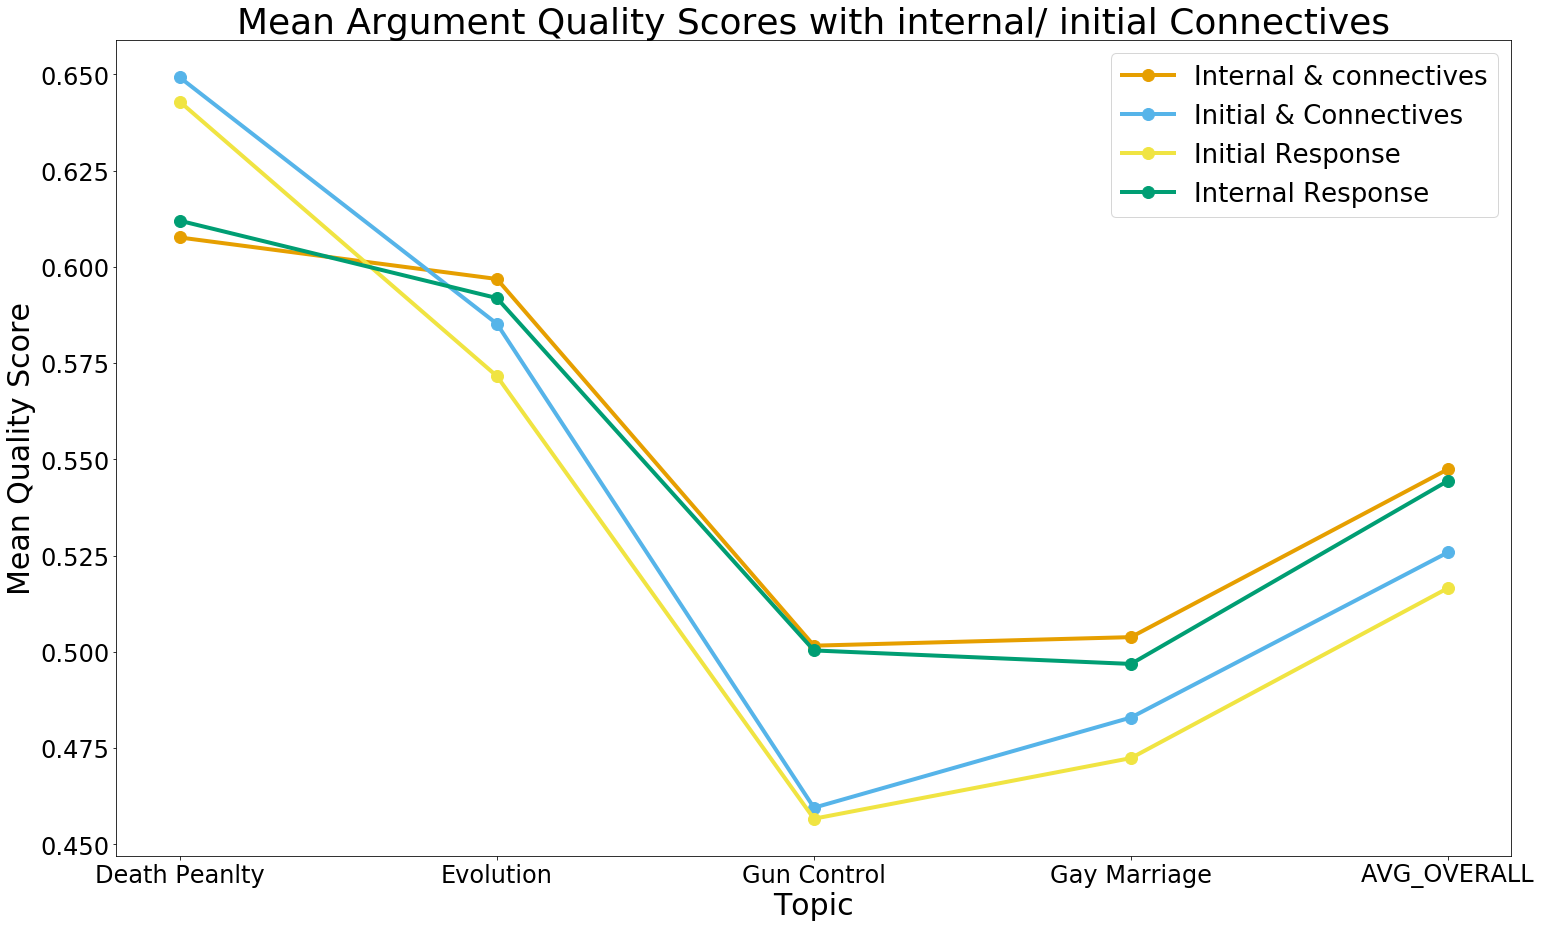

In [40]:
xs= ['Death Peanlty', 'Evolution', 'Gun Control', 'Gay Marriage', 'AVG_OVERALL']
plt.figure(figsize=(25, 15))
colors = ['#E69F00', '#56B4E9', '#F0E442', '#009E73', '#D55E00', 'margenta']

# fig, ax= plt.subplots()
plt.plot(xs, con_internal, marker='o', linewidth=4, markersize=12, label='Internal & connectives', color=colors[0])
plt.plot(xs, con_initial, marker='o',label='Initial & Connectives', color=colors[1],linewidth=4, markersize=12)
plt.plot(xs, initial , marker='o',label='Initial Response ', color=colors[2],linewidth=4, markersize=12)
plt.plot(xs, internal, marker='o',label='Internal Response', color=colors[3],linewidth=4, markersize=12)


plt.legend(fontsize=26)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.xlabel('Topic', fontsize=30)
plt.ylabel('Mean Quality Score',fontsize=30)
plt.title('Mean Argument Quality Scores with internal/ initial Connectives', fontsize=36)
plt.savefig('connective_internal_initial.png')

In [50]:
len(gm_con), len(gm_if)+ len(gm_but)+len(gm_so)+ len(gm_first)

(1130, 1117)

In [52]:
 set(gm[gm['Connective.x']!='no_connective']['Connective.x'])

{'but', 'first', 'i agree that', 'if', 'so'}

In [53]:
 set(gc[gc['Connective.x']!='no_connective']['Connective.x'])

{'but', 'first', 'if', 'so'}

In [54]:
 set(dp[dp['Connective.x']!='no_connective']['Connective.x'])

{'but', 'first', 'if', 'so'}

In [55]:
 set(evo[evo['Connective.x']!='no_connective']['Connective.x'])

{'but', 'first', 'if', 'so'}

In [40]:
for ap in [evo_no_con, evo_con, evo_if, evo_but, evo_so, evo_first]:
    print(np.mean(ap))

0.5490399509779412
0.5912058414316326
0.6138225287351723
0.5610560512389473
0.58832234299529
0.613141472868217


In [11]:
dp_aq = dp['GoodSliderMean'].to_list()
evo_aq = evo['GoodSliderMean'].to_list()
gc_aq = gc['GoodSliderMean'].to_list()
gm_aq = gm['GoodSliderMean'].to_list()
lines = ['Death Penalty', 'Evolution', 'Gun Control', 'Gay Marriage']
aqs=[dp_aq, evo_aq, gc_aq, gm_aq]
stats = dict(zip(lines, aqs))

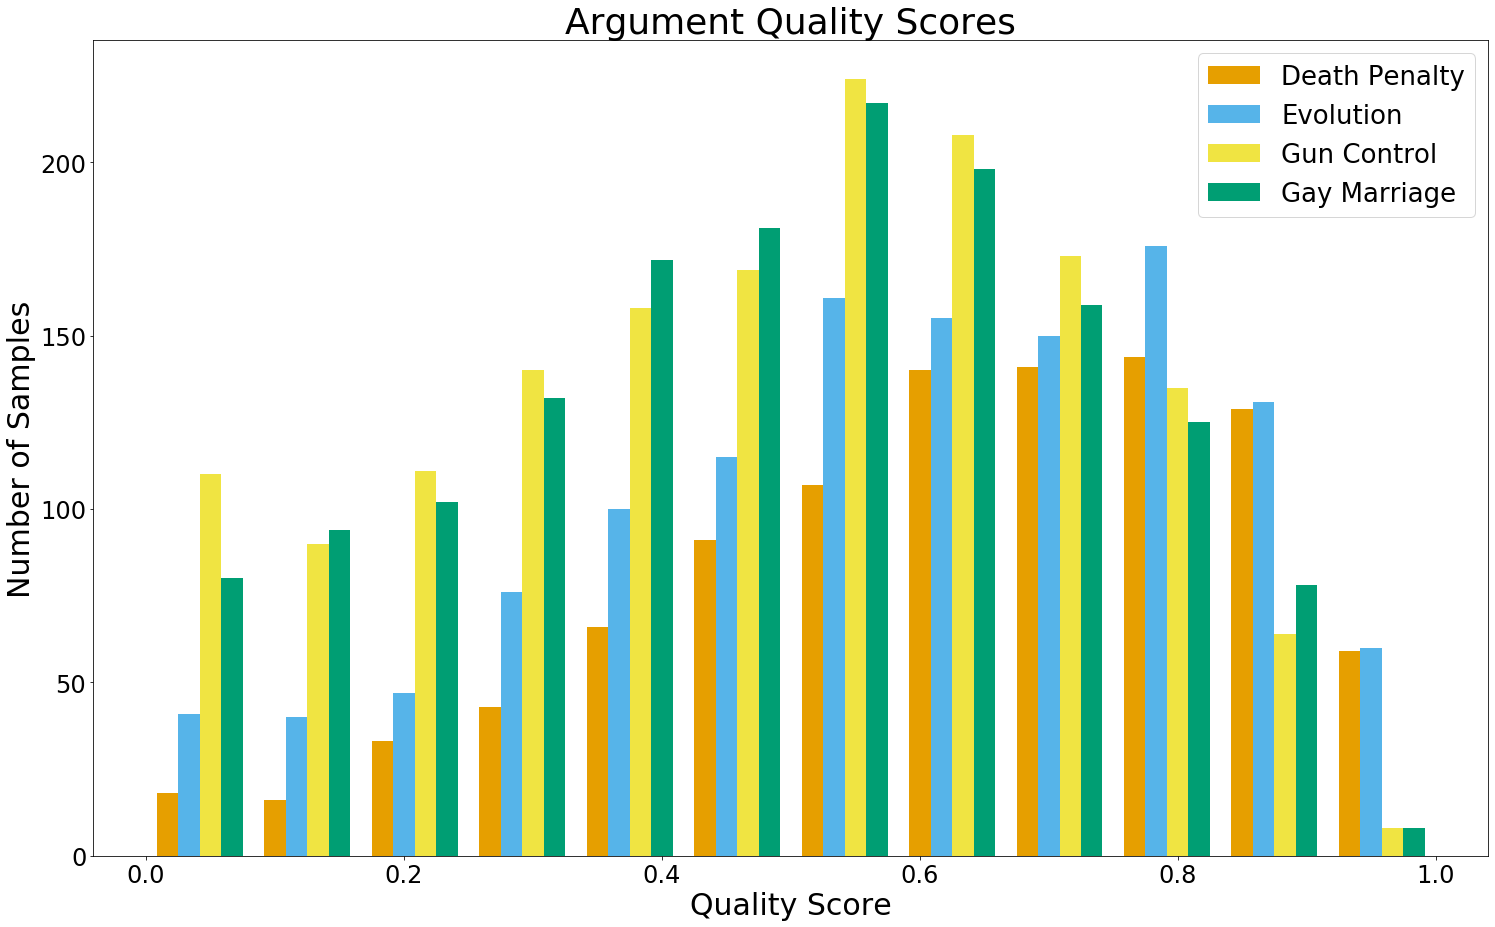

In [29]:
colors = ['#E69F00', '#56B4E9', '#F0E442', '#009E73']
plt.figure(figsize=(25,15))

plt.hist(aqs, bins= int(180/15),color=colors, label= lines)
plt.legend(fontsize=26)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.xlabel('Quality Score', fontsize=30)
plt.ylabel('Number of Samples',fontsize=30)
plt.title('Argument Quality Scores', fontsize=36)
plt.savefig('aqscores.png')

In [41]:
sents_dp = dp['Phrase.x'].to_list()
sents_evo = evo['Phrase.x'].to_list()
sents_gc= gc['Phrase.x'].to_list()
sents_gm = gm['Phrase.x'].to_list()

In [42]:
all_sents = sents_dp + sents_evo + sents_gc +sents_gm

In [44]:
tokenized_sents = [sent.split(' ') for sent in all_sents]

In [79]:
with open('sentences_argument_mining.txt', 'w') as file:
    for sent in all_sents:
        file.write(sent+'\n')

In [60]:
from collections import defaultdict
stats = defaultdict(int)
freqs = []
for tokens in tokenized_sents:
    stats[len(tokens)]+=1
    freqs.append(len(tokens))
    if len(tokens)<5:
        print(' '.join(tokens))
    

So what about murderers?
JESUS HATED CAPITOL PUNISHMENT.
so its justice
but Jesus stopped them.
They're not political prisoners...
Sarablaze~ I'm pro-death penalty.
But Jesus saved her.
Yeah, it's called "adultery".
Natural selection occures frequently.
Bacteria lack minds.
First, evolution IS science.
But the materialist (!)
Creationists are so pathetic.
What creation record?
But creationism never changes.
It isn't evolution.
Science does its thing.
It is a theory.
sorry theres also creation
If Creationism replaced science?
But evolution doesn't jump.
** Dumb mistake.
But that's not science.
But that isn't evolution.
** That's one possibility.
** Come on now!
Firstly, what is 'militia'?
First, bowling sucked.
I think it's fair.
First, link please.
First the pistol grip.
No, its not stupid.
First things first.
You don't think so?
First and formost....me.
I can't believe this.
First off.
But I digress.)
Yes, but it's something.
Ghost rider, shut up.
First of all.
No, I didn't.
cee, shut

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
freq = [x[1] for x in sorted(stats.items())]
lens = [x[0] for x in sorted(stats.items())]

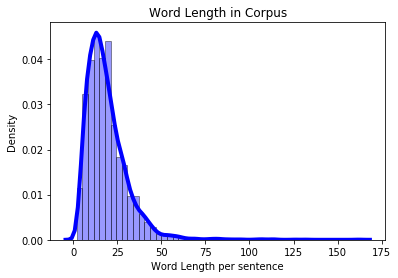

In [78]:
sns.distplot(freqs, hist=True, kde=True, color='blue', hist_kws={'edgecolor':'black'},
            kde_kws={'linewidth':4})
plt.xlabel('Word Length per sentence')
plt.ylabel('Density')
plt.title('Word Length in Corpus')
plt.savefig('plot.png')

In [18]:
np

,Unnamed: 0,ItemId,GoodSliderMean,GoodSliderDev,Connective.x,PairType.x,ResponseInitial.x,Phrase.x
0,1299,c6468528a79710c60f1977feb383c7d3,0.944833,0.084547,no_connective,QR,False,69% of adults favor stricter gun-control laws.
1,1105,a795fa5f17c7d1da2635206be3a72d8b,0.952250,0.091544,no_connective,P1_P2,False,Making another anti-gun law is like spitting i...


In [5]:
import numpy as np

In [19]:
np.mean(gm['GoodSliderMean'].to_list())

0.4845365783364812

In [30]:
mean_dp = np.mean(dp[dp['ResponseInitial.x']=='true']['GoodSliderMean'].to_list())
print(mean_dp)

0.6429103592318296


In [27]:
mean_gm = np.mean(gm[gm['ResponseInitial.x']==True]['GoodSliderMean'].to_list())
print(mean_gm)

0.47240072131553273


In [26]:
mean_gc = np.mean(gc[gc['ResponseInitial.x']==True]['GoodSliderMean'].to_list())
mean_gc

0.4566435345331719

In [28]:
mean_evo = np.mean(evo[evo['ResponseInitial.x']==True]['GoodSliderMean'].to_list())
mean_evo

0.5716295931389163

In [31]:
np.mean([mean_evo, mean_gm, mean_gc, mean_dp]) # response-initial sentences/

0.5358960520548626

In [32]:
mean_dp = np.mean(dp[dp['ResponseInitial.x']=='false']['GoodSliderMean'].to_list())
mean_gm = np.mean(gm[gm['ResponseInitial.x']==False]['GoodSliderMean'].to_list())
mean_gc = np.mean(gc[gc['ResponseInitial.x']==False]['GoodSliderMean'].to_list())
mean_evo = np.mean(evo[evo['ResponseInitial.x']==False]['GoodSliderMean'].to_list())


In [33]:
np.mean([mean_evo, mean_gm, mean_gc, mean_dp]) # response-non-initial sentences/

0.5502838945540791

In [9]:
sentences_dp = dp['Phrase.x'].to_list()

In [13]:
len(dp[dp['Connective.x']=='no_connective'])

263

In [14]:
len(dp)

987

In [15]:
gc = pd.read_csv(os.path.join(data_dir, 'gc-slider-means.csv'))

In [16]:
len(gc)

1590

In [17]:
gc.head(2)

,Unnamed: 0,ItemId,GoodSliderMean,GoodSliderDev,Connective.x,PairType.x,ResponseInitial.x,Phrase.x
0,1299,c6468528a79710c60f1977feb383c7d3,0.944833,0.084547,no_connective,QR,False,69% of adults favor stricter gun-control laws.
1,1105,a795fa5f17c7d1da2635206be3a72d8b,0.952250,0.091544,no_connective,P1_P2,False,Making another anti-gun law is like spitting i...
